# **PROJECT**

I have successfuly modelled the Stock Market using the Ising Model in physics and Pavel Dvorak distribution equation and then used concepts such as Volatility Clustering, Fat-Tail Curve, Minor Game, Herding and Autocorrelation of Returns to compare my model's graphs with real world data of "S&P 500" stock data to check the credebility of my model.


## **ISING MODEL COLORBAR CODE**

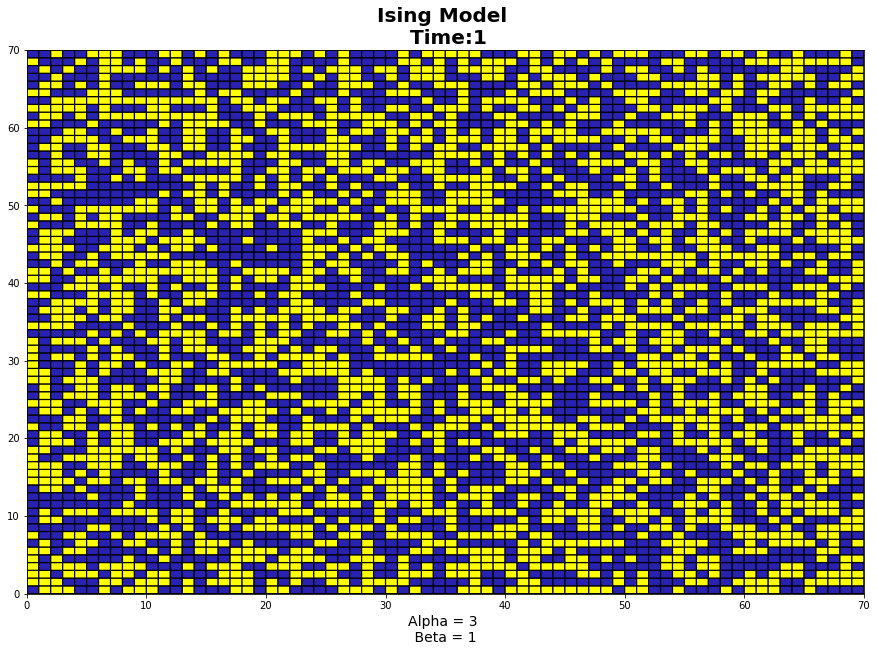

In [1]:
import numpy as np
from pylab import *
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import pcolormesh , show

# Defining Constants #
k = 70
iterations = 1
J = 1
alpha = 3
beta = 1
dt = 100 
parallel = 0

# Defining Arrays #
spinArray = np.matrix(np.zeros((k, k), dtype = np.float))
h = np.matrix(np.zeros((k, k), dtype = np.float))
stock = np.ones(iterations) 
mag = prob = np.zeros(iterations) 
prob = np.zeros(iterations) 
r = np.zeros(iterations) 
returns = np.zeros(iterations) 

# Defining Colors of my colorbar #
colors  =   [(41/255,34/255,177/255),   #Persian Blue
             (255/255,255/255,0/255)]  #Yellow

colormap = LinearSegmentedColormap.from_list('my_colormap', colors)

for i in range(70):
    for j in range(70):
        spinArray[i,j] = round(np.random.random())*2-1 

for t in range(iterations):
    for l in range(k):
        for p in range(k):
            mag[t] += (1/k**2)*spinArray[l,p]
    for n in range(k):
        for m in range(k):
            if parallel == 0:
                n = round(np.random.random()*(k-1))
                m = round(np.random.random()*(k-1))
            center = spinArray[n,m]
            if n == 0:
                top = spinArray[k-1,m]
            else:
                top = spinArray[n-1,m]
            if n == k-1:
                bottom = spinArray[0,m]
            else:
                bottom = spinArray[n+1,m]
            if m == k-1:
                right = spinArray[n,0]
            else:
                right = spinArray[n,m+1]
            if m == 0:
                left = spinArray[n,k-1]
            else:
                left = spinArray[n,m-1]
            
        h[n,m] = (top+bottom+left+right)*center - alpha*abs(mag[t])
        prob[t] = 1/(1+np.exp(-1*beta*h[n,m]))
        if h[n,m] <= 0:
            spinArray[n,m] = -1*spinArray[n,m]
        else:
            r[t] = np.random.random()
            if r[t] >= prob[t]:
                spinArray[n,m] = -1*spinArray[n,m]
                
    if t>0:
        returns[t] = mag[t] - mag[t-1]
        stock[t] = stock[t-1] + returns[t]
                
    fig, axs = plt.subplots(figsize=(15,10))
    axs.set_title(f"Ising Model \n Time:{t+1}",fontsize=20,fontweight='bold')
    axs.set_xlabel(f"Alpha = {alpha} \n Beta = {beta} ",fontsize=14)
    y = spinArray.tolist()
    axs.pcolor(y,cmap = colormap, edgecolors='k', linewidths=1.2)
    #savefig(f"{t}.png")
    show()     
   

 # Exporting our arrays into Excel files #
returns = pd.DataFrame(returns)
stock = pd.DataFrame(stock)
#returns.to_excel('returns.xlsx')
#stock.to_excel('stock.xlsx')

## **DOWNLOADING DATA FROM YAHOO FINANCE**

In [ ]:
import pandas as pd
import yfinance as yf

stock_data = yf.download(["^GSPC"], start="1981-01-02", end="2015-10-20")  ##### ^GSPC is represents S&P 500 Stock #####
stock_data.to_excel('SP Data.xlsx')

[*********************100%***********************]  1 of 1 completed


## **IMPORTING DATA INTO PYTHON**

In [ ]:
from pylab import *
from numpy import *
from pandas import *
from math import *
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

IsingModel = 0      ##### TOGGLE b/w "STOCK MARKET" DATA and "ISING MODEL" DATA #####

if IsingModel == 0:    
    data = read_excel("Data/S&P 500/SP Data.xlsx") ##### Replace 'S&P 500' with 'NIFTY 50' to TOGGLE ######
    dailyValue = transpose(data.Close)                                       
    returns = transpose(data.Simple_Returns) 
else:
    data = read_excel("Data/S&P 500/stock.xlsx")    
    dailyValue = transpose(data.Stock_Prices)       ##### THIS WILL REMAIN THE SAME FOR BOTH CASES #####
    data1 = read_excel("Data/S&P 500/returns.xlsx")
    returns = transpose(data1.Returns) 
    
    
dataSize = size(dailyValue)
startDate = date.toordinal(date(year=1981, month=1, day=2))  ##### SETTING X-AXIS AS THE DAYS ##### 
endDate = date.toordinal(date(year=2015, month=10, day=20))
xData = linspace(startDate,endDate,dataSize)


## **PLOTTING STOCKS**

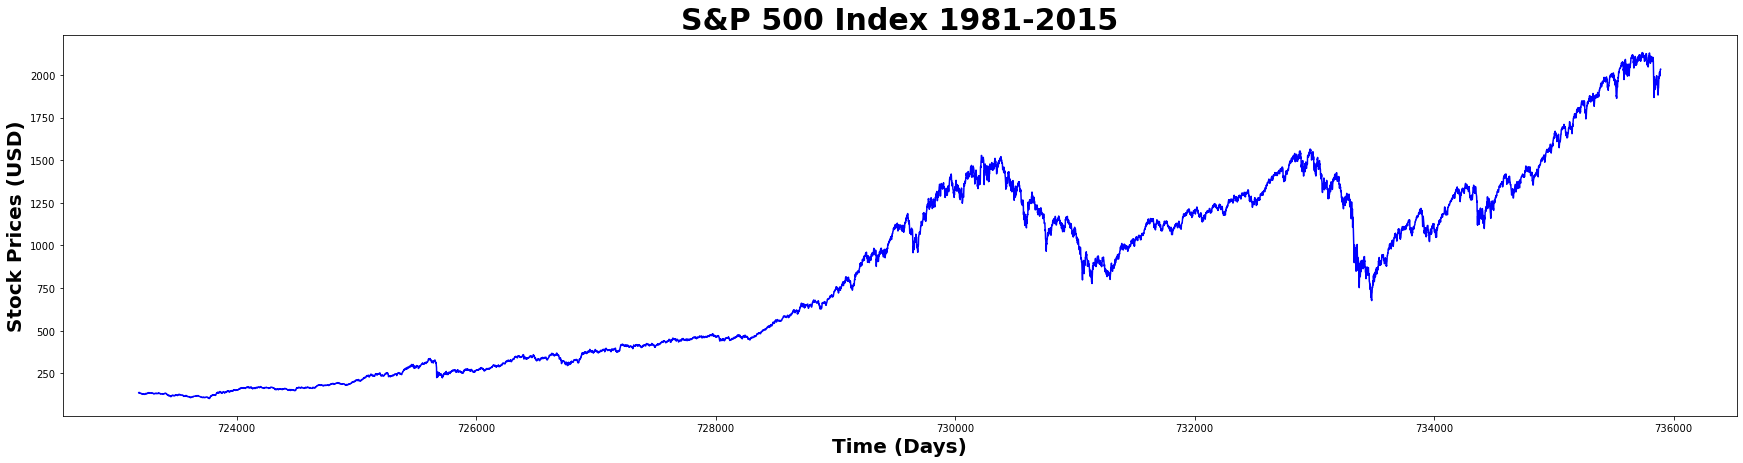

In [ ]:
if IsingModel == 0:
    fig, axs = plt.subplots(figsize=(30,7))
    axs.plot(xData,dailyValue,'blue')
    axs.set_title('S&P 500 Index 1981-2015',fontsize=30,fontweight='bold')
    #axs.set_title('NIFTY 50 Index 2007-2021',fontsize=30,fontweight='bold')
    axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
    axs.set_ylabel('Stock Prices (USD)',fontsize=20,fontweight='bold')
else:
    fig, axs = plt.subplots(figsize=(30,7))
    axs.plot(xData,dailyValue,'blue')
    axs.set_title('Ising Model Stocks',fontsize=30,fontweight='bold')
    axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
    axs.set_ylabel('Stock Prices (USD)',fontsize=20,fontweight='bold')

## **PLOTTING DAILY RETURNS (VOLATILITY CLUSTERING)**

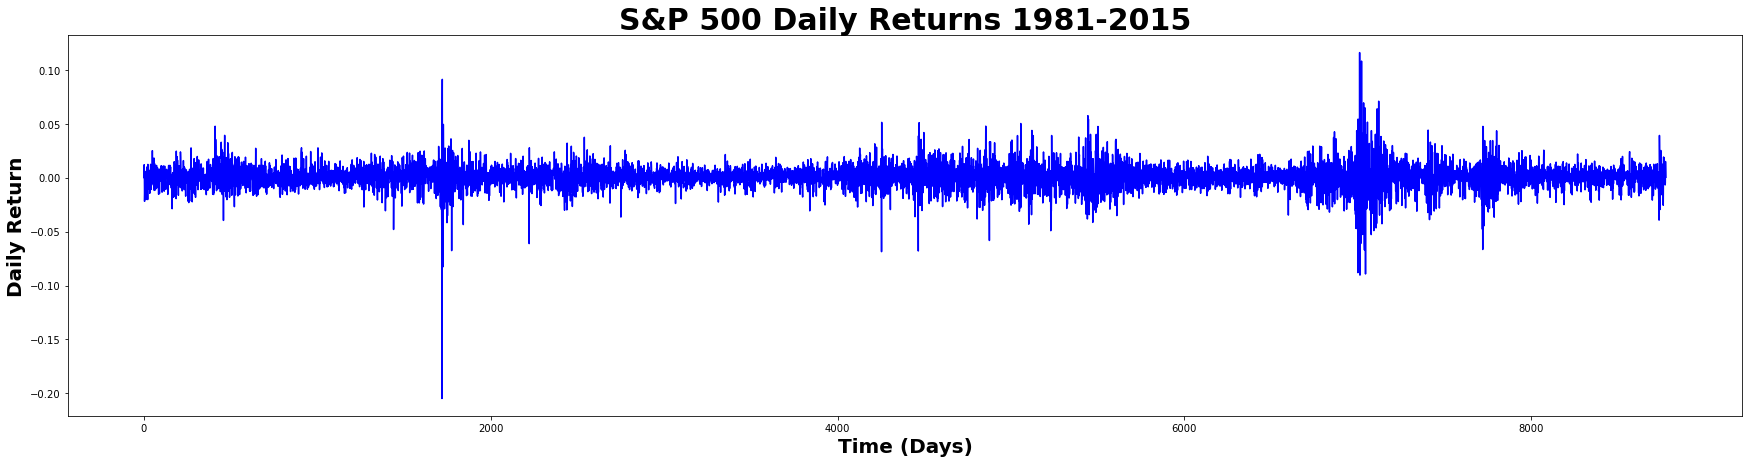

In [ ]:
if IsingModel == 0:
    fig, axs = plt.subplots(figsize=(30,7))
    axs.plot(returns,'blue')
    axs.set_title('S&P 500 Daily Returns 1981-2015',fontsize=30,fontweight='bold')
    #axs.set_title('NIFTY 50 Daily Returns 2007-2021',fontsize=30,fontweight='bold')
    axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
    axs.set_ylabel('Daily Return',fontsize=20,fontweight='bold')
else:
    fig, axs = plt.subplots(figsize=(30,8))
    axs.plot(returns,'blue')
    axs.set_title('Ising Model Daily Returns',fontsize=30,fontweight='bold')
    axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
    axs.set_ylabel('Daily Returns (USD)',fontsize=20,fontweight='bold')

## **PLOTTING HISTOGRAM OF DAILY RETURNS (FAT-TAIL DISTRIBUTION)**

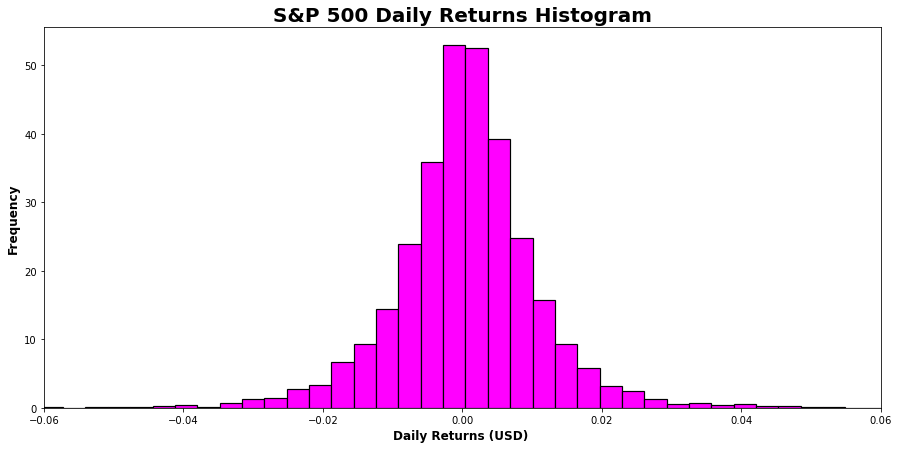

In [ ]:
if IsingModel == 0:
    fig, axs = plt.subplots(figsize=(15,7))
    axs.hist(returns,100,density=True,edgecolor='black', linewidth=1.2, facecolor='fuchsia')
    axs.set_title('S&P 500 Daily Returns Histogram',fontsize=20,fontweight='bold')
    #axs.set_title('NIFTY 50 Daily Returns Histogram',fontsize=20,fontweight='bold')
    axs.set_xlabel('Daily Returns (USD) ',fontsize=12,fontweight='bold')
    axs.set_ylabel('Frequency',fontsize=12,fontweight='bold')
    axs.set_xlim(-0.06,0.06)
else:
    fig, axs = plt.subplots(figsize=(15,7))
    axs.hist(returns,30,density=True,edgecolor='black', linewidth=1.2, facecolor='fuchsia')
    axs.set_title('Ising Model Daily Returns Histogram',fontsize=20,fontweight='bold')
    axs.set_xlabel('Daily Returns (USD) ',fontsize=12,fontweight='bold')
    axs.set_ylabel('Frequency',fontsize=12,fontweight='bold')


## **AUTOCORRELATION OF RETURNS**

In [ ]:
##### DEFINING CONSTANTS #####
nmax , C , sigma , mu , n , dn , average , tauMax  = size(returns) , 0 , 0.2 , 0 , 0 , 1 , 0 , 180 
for i in range(dataSize-1):
    average += returns[i]
average = average/dataSize
ACReturns = zeros(tauMax)
n = 0
X = linspace(0,tauMax,180)

for tau in range(tauMax):
    numerator = 0
    denominator = 0
    for m in range(tau,dataSize-1):
        numerator += ((abs(returns[m])-abs(average))*(abs(returns[m-tau])-abs(average)))
        denominator += ((abs(returns[m-tau])-abs(average))**2)
    ACReturns[n] = numerator/denominator
    n += 1

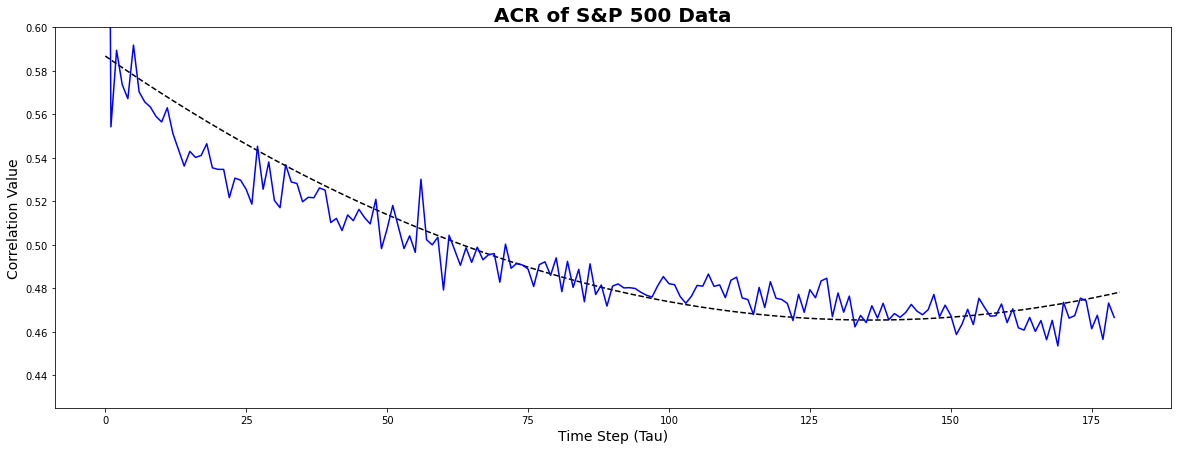

In [ ]:
if IsingModel == 0:
    fig, axs = plt.subplots(figsize=(20,7))
    z = np.polyfit(X, ACReturns, 2)
    p = np.poly1d(z)
    axs.plot(X,p(X),"k--",linewidth=1.5)
    axs.plot(ACReturns,'blue')
    axs.set_title('ACR of S&P 500 Data',fontsize=20,fontweight='bold')
    #axs.set_title('ACR of NIFTY 50 Data',fontsize=20,fontweight='bold')
    axs.set_xlabel('Time Step (Tau)',fontsize=14)
    axs.set_ylabel('Correlation Value',fontsize=14)
    axs.set_ylim(0.425,0.60)
else:
    fig, axs = plt.subplots(figsize=(20,7))
    #z = np.polyfit(X, ACReturns, 2)
    #p = np.poly1d(z)
    #axs.plot(X,p(X),"k--",linewidth=1.5)
    axs.plot(ACReturns,'blue')
    axs.set_title('ACR of Ising Model Data',fontsize=20,fontweight='bold')
    axs.set_xlabel('Time Step (Tau)',fontsize=14,fontweight='bold')
    axs.set_ylabel('Correlation Value',fontsize=14,fontweight='bold')
    axs.set_ylim(0.615,0.65)

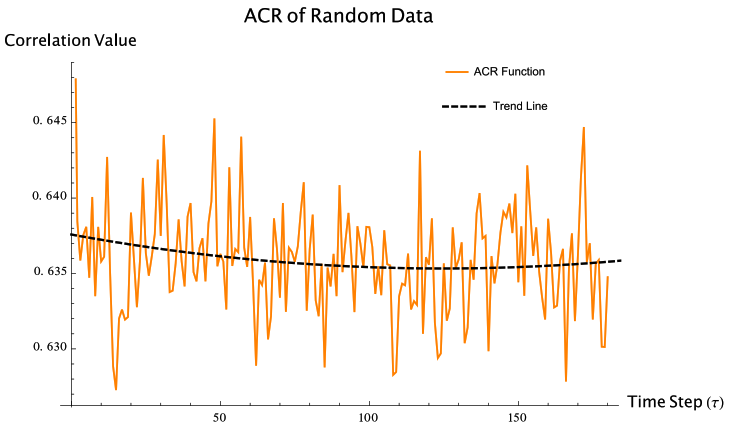